# (MBTI) Myers-Briggs Personality Type Dataset

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset 

In [2]:
mbti_data=pd.read_csv('mbti_1.csv')
mbti_data.columns

Index(['type', 'posts'], dtype='object')

In [3]:
mbti_data.type.value_counts(dropna=False).head()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
Name: type, dtype: int64

In [4]:
frm_msg=pd.read_csv('ForumMessages.csv')
frm_msg.columns

Index(['Id', 'ForumTopicId', 'AuthorUserId', 'PostDate', 'Message',
       'ReplyToForumMessageId', 'TopicMessagePosition', 'RawMarkdown', 'Score',
       'FlaggedCount'],
      dtype='object')

In [5]:
frm_msg.FlaggedCount.value_counts(dropna=False)

0    90506
1      154
2       33
3        8
4        2
Name: FlaggedCount, dtype: int64

In [6]:
frm_msg.FlaggedCount.value_counts(dropna=False)

0    90506
1      154
2       33
3        8
4        2
Name: FlaggedCount, dtype: int64

In [7]:
frm_msg.Score.value_counts(dropna=False).head()

0    60658
1    14803
2     5762
3     2786
4     1532
Name: Score, dtype: int64

In [8]:
usr=pd.read_csv('Users.csv')
usr.columns

Index(['Id', 'UserName', 'DisplayName', 'RegisterDate', 'Points', 'Ranking',
       'Tier', 'HighestRanking'],
      dtype='object')

In [9]:
usr.HighestRanking.value_counts(dropna=False).head()

NaN         510132
 27059.0     14570
 28941.0       159
 2532.0         37
 157.0          22
Name: HighestRanking, dtype: int64

In [10]:
usr.Ranking.value_counts(dropna=False).head()

NaN         510138
 32767.0         1
 54670.0         1
 13666.0         1
 25888.0         1
Name: Ranking, dtype: int64

In [11]:
mbti = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling', 
        'J':'Judging', 'P': 'Perceiving'}

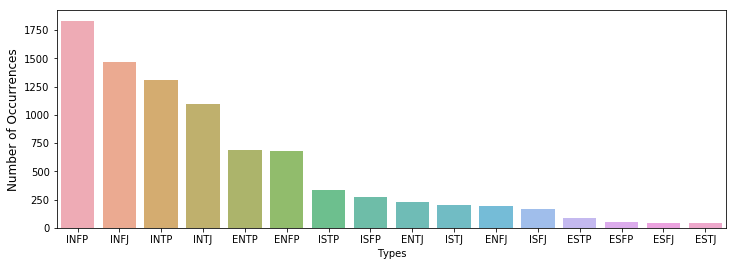

In [12]:
mbti_type = mbti_data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(mbti_type.index, mbti_type.values, alpha=0.8)
plt.xlabel('Types', fontsize=10)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

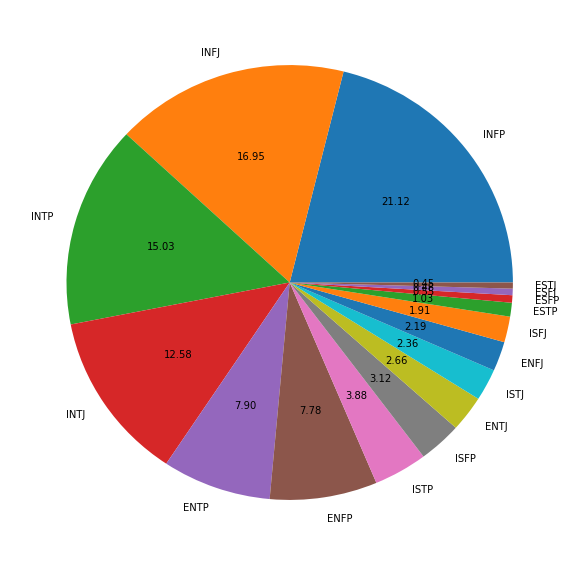

In [13]:
plt.subplots(figsize=(10,10))
plt.pie(x=mbti_type.values,labels=mbti_type.index,data=mbti_type, autopct='%.2f')
plt.show()

In [14]:
frm_msg['Message']= frm_msg['Message'].fillna('')

In [15]:
frm_msg[:5]

,Id,ForumTopicId,AuthorUserId,PostDate,Message,ReplyToForumMessageId,TopicMessagePosition,RawMarkdown,Score,FlaggedCount
0,1,1,478,2010-04-28 23:13:08,<div>In response to a comment on the No Free H...,NaN,1,NaN,0,0
1,76,1,808,2010-04-28 23:13:08,Use a mixture of different models (linear regr...,NaN,2,NaN,0,0
2,116,1,1486,2010-04-28 23:13:08,My first thoughts on this problem are that it ...,NaN,3,NaN,0,0
3,119,1,703,2010-04-28 23:13:08,The theory of deep belief networks is probably...,NaN,4,NaN,0,0
4,130,1,1486,2010-04-28 23:13:08,"Going by Hinton's last two google techtalks, r...",NaN,5,NaN,0,0


In [16]:
usr[:5]

,Id,UserName,DisplayName,RegisterDate,Points,Ranking,Tier,HighestRanking
0,1,kaggle,Kaggle,2011-03-24 02:17:07,NaN,NaN,1,NaN
1,368,antgoldbloom,Anthony Goldbloom,2010-01-20 01:07:25,981.099976,7055.0,4,75.0
2,381,iguyon,Isabelle,2010-01-29 20:07:37,308.399994,17576.0,4,2824.0
3,383,NaN,David Stephan,2010-02-01 04:03:43,NaN,NaN,1,NaN
4,384,NaN,Gabe Warren,2010-02-02 00:18:02,NaN,NaN,1,NaN


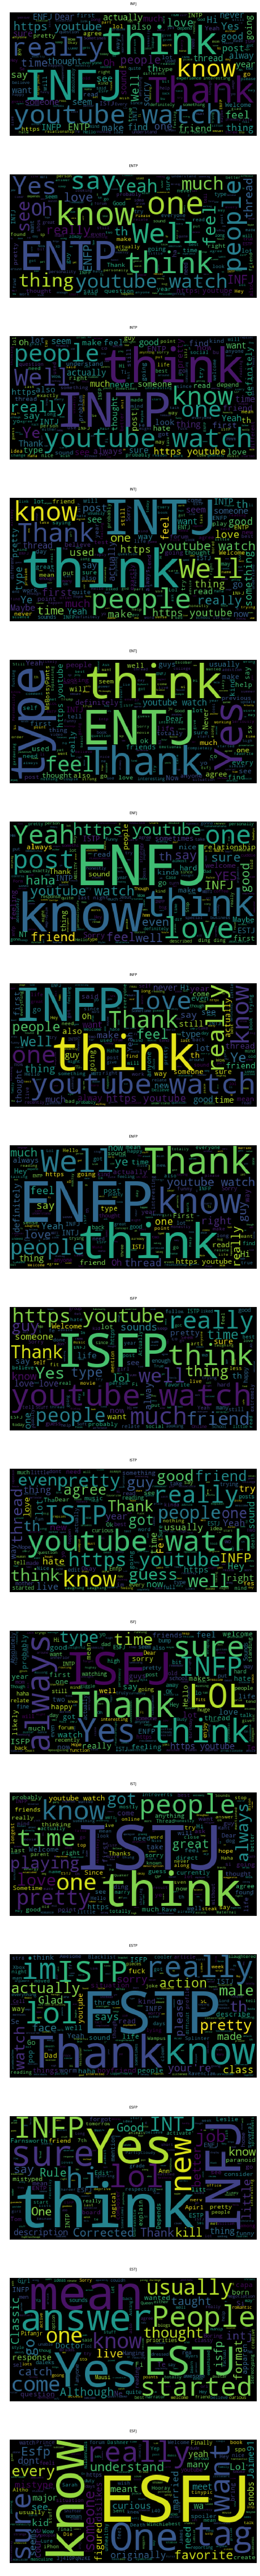

In [17]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(mbti_data['type'].unique()), sharex=True, figsize=(15,10*len(mbti_data['type'].unique())))

k = 0
for i in mbti_data['type'].unique():
    df_4 = mbti_data[mbti_data['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

plt.show()

#### Group by Form Message

In [18]:
frm_msg_join=frm_msg.groupby('AuthorUserId')['Message'].agg(lambda col: ' '.join(col)).reset_index()

In [19]:
frm_msg[frm_msg['AuthorUserId']==703]

,Id,ForumTopicId,AuthorUserId,PostDate,Message,ReplyToForumMessageId,TopicMessagePosition,RawMarkdown,Score,FlaggedCount
3,119,1,703,2010-04-28 23:13:08,The theory of deep belief networks is probably...,NaN,4,NaN,0,0
5,131,1,703,2010-04-28 23:13:08,I believe I understand deep belief nets well e...,NaN,6,NaN,0,0
8,151,1,703,2010-04-28 23:13:08,"Heh.<br><br>I've got almost 10,000 lines of co...",NaN,9,NaN,0,0
17,211,1,703,2010-04-28 23:13:08,My MCE values are not accurate. I'm not predic...,NaN,18,NaN,0,0
33,53,6,703,2010-05-01 11:56:47,Don't get hung up because you don't know machi...,NaN,3,NaN,0,0
35,81,6,703,2010-05-01 11:56:47,I don't have access to SpringerLink.<br><br>Ca...,NaN,5,NaN,0,0
44,22,10,703,2010-05-06 13:56:24,"You probably know this, but in case you don't ...",NaN,2,NaN,0,0
47,23,12,703,2010-05-07 20:52:31,"<a href=""http://www.OkianWarrior.com/Enjoys/Ka...",NaN,1,NaN,0,0
48,31,12,703,2010-05-07 20:52:31,A new version is available with some enhanceme...,NaN,2,NaN,0,0
50,33,12,703,2010-05-07 20:52:31,Cory's proteomics data is now included in the ...,NaN,4,NaN,0,0


In [20]:
usr[usr['Id']==703]

,Id,UserName,DisplayName,RegisterDate,Points,Ranking,Tier,HighestRanking
292,703,NaN,Rajstennaj Barrabas,2010-05-05 22:46:45,375.100006,15175.0,4,20.0


In [21]:
frm_msg = pd.merge(frm_msg_join, usr, how='left', left_on='AuthorUserId', right_on='Id')

In [22]:
frm_msg[frm_msg['AuthorUserId']==703]

,AuthorUserId,Message,Id,UserName,DisplayName,RegisterDate,Points,Ranking,Tier,HighestRanking
29,703,The theory of deep belief networks is probably...,703.0,NaN,Rajstennaj Barrabas,2010-05-05 22:46:45,375.100006,15175.0,4.0,20.0


In [41]:
from bs4 import BeautifulSoup
import re

def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    return text

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')

In [32]:
#from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
#X_train, X_test, y_train, y_test = train_test_split(tfid, mbti_data['type'], test_size=0.2, random_state=42)
tsvd = TruncatedSVD(n_components=10)

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline

etc = ExtraTreesClassifier(n_estimators = 20, max_depth=4, n_jobs = -1)
model = Pipeline([('tfidf1', tfid), ('tsvd1', tsvd), ('etc', etc)])

In [43]:
mbti_data['clean'] = mbti_data['posts'].apply(cleanText)
#model.fit(mbti_data['clean'], mbti_data['type'])
mbti_data['clean'].head()

0    '<URL> <URL> enfp and intj moments  <URL>  spo...
1    'I'm finding the lack of me in these posts ver...
2    'Good one  _____   <URL> Of course, to which I...
3    'Dear INTP,   I enjoyed our conversation the o...
4    'You're fired. That's another silly misconcept...
Name: clean, dtype: object